In [1]:
import numpy       as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

import pyet
import os
# import warnings
# from scipy.stats import linregress
# warnings.simplefilter("ignore")
# plt.rcParams["figure.autolayout"] = True
# plt.rcParams['axes.grid'] = True

### East Brookfield

In [3]:
PRCP = pd.read_csv("Data/3856321.csv", delimiter=',', index_col=0, usecols=[1,2])*25.4  #inches to mm
pd.to_datetime(PRCP.index)

TEMP_avg = pd.read_csv("Data/3856321.csv", delimiter=',', index_col=0, usecols=[1,3])
pd.to_datetime(TEMP_avg.index)
TEMP_avg['TAVG'] = (TEMP_avg.values - 32)/1.8 #fahrenheit to Celcius

TEMP_max = pd.read_csv("Data/3856321.csv", delimiter=',', index_col=0, usecols=[1,4])
pd.to_datetime(TEMP_max.index)
TEMP_max['TMAX'] = (TEMP_max.values - 32)/1.8 #fahrenheit to celsius

TEMP_min = pd.read_csv("Data/3856321.csv", delimiter=',', index_col=0, usecols=[1,5])
pd.to_datetime(TEMP_min.index)
TEMP_min['TMIN'] = (TEMP_min.values - 32)/1.8 #fahrenheit to celsius

LAT = 42.1103 * np.pi / 180 # Latitude [rad]
ELE = 700 * 0.3048 # feet to meters

In [14]:
# Step 1: Generate the full date range
full_range = pd.date_range(start="1965-01", end="2024-10", freq="MS")

# Step 2: Extract the dates in your series
existing_dates = TEMP_avg.index

# Step 3: Find missing dates
missing_dates = full_range.difference(existing_dates)

print("Missing Dates:")
print(missing_dates)

Missing Dates:
DatetimeIndex(['2002-05-01', '2008-04-01', '2008-05-01', '2008-06-01',
               '2008-07-01', '2008-08-01', '2008-09-01', '2008-10-01',
               '2008-11-01', '2008-12-01', '2009-01-01', '2009-02-01',
               '2009-03-01', '2009-04-01', '2009-05-01', '2009-06-01',
               '2009-07-01', '2009-08-01', '2009-09-01', '2009-10-01',
               '2009-11-01', '2009-12-01', '2010-01-01', '2010-02-01',
               '2010-03-01', '2010-04-01', '2010-05-01', '2010-06-01',
               '2010-07-01', '2010-08-01', '2010-09-01', '2010-10-01',
               '2010-11-01', '2010-12-01'],
              dtype='datetime64[ns]', freq=None)


In [15]:
average_value = TEMP_avg.mean()

# Step 4: Create a DataFrame for the missing dates
missing_data = pd.Series(average_value[0], index=missing_dates)

# Step 5: Combine existing and missing data
filled_series = pd.concat([TEMP_avg, missing_data])

#filled_series = filled_series.iloc[:, 0].combine_first(filled_series.iloc[:, 1])

#filled_series = pd.Series(filled_series, index=filled_series.index)

# # Step 6: Sort the series by date
#T_avg = filled_series.sort_index()
filled_series


,TAVG,0
1965-01,-7.166667,NaN
1965-02,-5.000000,NaN
1965-03,0.166667,NaN
1965-04,5.722222,NaN
1965-05,15.111111,NaN
...,...,...
2010-08-01 00:00:00,NaN,8.567939
2010-09-01 00:00:00,NaN,8.567939
2010-10-01 00:00:00,NaN,8.567939
2010-11-01 00:00:00,NaN,8.567939


### Hargreaves

In [37]:
pet_har = pyet.hargreaves(TEMP_avg['TAVG'], TEMP_max['TMAX'], TEMP_min['TMIN'], LAT, method=1)


In [41]:
pet_har.to_csv('Data\Evap.csv')  


### Blaney Criddle

In [39]:
pet_bc = pyet.blaney_criddle(TEMP_avg['TAVG'], LAT)

In [40]:
pet_bc

DATE
1965-01    0.000000
1965-02    0.000000
1965-03    0.424479
1965-04    1.386584
1965-05    3.009176
             ...   
2024-06    4.162986
2024-07    4.577966
2024-08    3.938434
2024-09    2.921127
2024-10    1.796174
Name: Blaney_Criddle, Length: 684, dtype: float64

### Sunderland

In [14]:
PRCP = pd.read_csv("Data/3870796.csv", delimiter=',', index_col=0, usecols=[2,3])  #inches to mm
pd.to_datetime(PRCP.index)

# TEMP_avg = pd.read_csv("Data/3856321.csv", delimiter=',', index_col=0, usecols=[1,3])
# pd.to_datetime(TEMP_avg.index)
# TEMP_avg['TAVG'] = (TEMP_avg.values - 32)/1.8 #fahrenheit to Celcius

TEMP_max = pd.read_csv("Data/3870796.csv", delimiter=',', index_col=0, usecols=[2,6])
pd.to_datetime(TEMP_max.index)

TEMP_min = pd.read_csv("Data/3870796.csv", delimiter=',', index_col=0, usecols=[2,7])
pd.to_datetime(TEMP_min.index)

TEMP_avg = (TEMP_max['TMAX'] + TEMP_min['TMIN']) / 2

# Create a new DataFrame for TEMP_avg with the same index
TEMP_avg = pd.DataFrame(TEMP_avg, columns=['TEMP_avg'])

LAT = 42.3861 * np.pi / 180 # Latitude [rad]


In [16]:
TEMP_max

,TMAX
DATE,
1965-01-01,2.2
1965-01-02,-1.1
1965-01-03,-3.9
1965-01-04,-2.8
1965-01-05,2.2
...,...
2024-12-02,2.2
2024-12-03,3.3
2024-12-04,2.8


### Hargreaves

In [32]:
pet_har = pyet.hargreaves(TEMP_avg['TEMP_avg'], TEMP_max['TMAX'], TEMP_min['TMIN'], LAT, method=1)

C:\Users\irish\anaconda\envs\mude\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [6]:
files = [
    {"file": "Precip_Temp/AUGUSTA_STATE_AIRPORT_ME_US.csv"},
    {"file": "Precip_Temp/ACADIA_NATIONAL_PARK_ME_US.csv"},
    {"file": "Precip_Temp/BANGOR_INTERNATIONAL_AIRPORT_ME_US.csv"},
    {"file": "Precip_Temp/BINGHAM_WYMAN_DAM_ME_US.csv"},
    {"file": "Precip_Temp/BRASSUA_DAM_ME_US.csv"},
    {"file": "Precip_Temp/BRIDGEWATER_ME_US.csv"},
    {"file": "Precip_Temp/BRIDGTON_3_NW_ME_US.csv"},
    {"file": "Precip_Temp/BRUNSWICK_NAS_ME_US.csv"},
    {"file": "Precip_Temp/CARIBOU_WEATHER_FORECAST_OFFICE_ME_US.csv"},
    {"file": "Precip_Temp/CORINNA_ME_US.csv"},
    {"file": "Precip_Temp/DOVER_FOXCROFT_WWTP_ME_US.csv"},
    {"file": "Precip_Temp/EASTPORT_ME_US.csv"},
    {"file": "Precip_Temp/FARMINGTON_ME_US.csv"},
    {"file": "Precip_Temp/GARDINER_ME_US.csv"},
    {"file": "Precip_Temp/HARMONY_ME_US.csv"},
]


# Loop over each file and its corresponding height
for entry in files:
    file_path = entry["file"]

    station_name = os.path.basename(file_path).split('.')[0]

    
    # Read and process the data
    TEMP_max = pd.read_csv(file_path, delimiter=',', usecols=['DATE', 'TMAX'], 
                     parse_dates=['DATE'], index_col='DATE').squeeze()
    
    TEMP_min = pd.read_csv(file_path, delimiter=',', usecols=['DATE', 'TMIN'], 
                     parse_dates=['DATE'], index_col='DATE').squeeze()
    
    TEMP_avg = (TEMP_max['TMAX'] + TEMP_min['TMIN']) / 2
    TEMP_avg = pd.DataFrame(TEMP_avg, columns=['TEMP_avg'])
    
    lat =  pd.read_csv(file_path, delimiter=',', usecols=['LATITUDE'])

    LAT = lat.at[0, 'LATITUDE'] * np.pi / 180 # Latitude [rad]
    
    df[f'pet_har_{station_name}'] = pyet.hargreaves(TEMP_avg['TEMP_avg'], TEMP_max['TMAX'], TEMP_min['TMIN'], LAT, method=1)



KeyError: 'TMAX'

In [ ]:
PRCP = pd.read_csv("Data/3856321.csv", delimiter=',', index_col=0, usecols=[1,2])*25.4  #inches to mm
pd.to_datetime(PRCP.index)

TEMP_avg = pd.read_csv("Data/3856321.csv", delimiter=',', index_col=0, usecols=[1,3])
pd.to_datetime(TEMP_avg.index)
TEMP_avg['TAVG'] = (TEMP_avg.values - 32)/1.8 #fahrenheit to Celcius

TEMP_max = pd.read_csv("Precip_Temp/BRUNSWICK_NAS_ME_US.csv", delimiter=',', usecols=['DATE', 'TMAX'], 
                     parse_dates=['DATE'], index_col='DATE').squeeze()

TEMP_min = pd.read_csv("Precip_Temp/BRUNSWICK_NAS_ME_US.csv", delimiter=',', usecols=['DATE', 'TMIN'], 
                     parse_dates=['DATE'], index_col='DATE').squeeze()

LAT = 42.1103 * np.pi / 180 # Latitude [rad]
ELE = 700 * 0.3048 # feet to meters

In [47]:
# Read and process the date
TEMP_max = pd.read_csv("Precip_Temp/BRUNSWICK_NAS_ME_US.csv", delimiter=',', usecols=['DATE', 'TMAX'], 
                     parse_dates=['DATE'], index_col='DATE')

TEMP_min = pd.read_csv("Precip_Temp/BRUNSWICK_NAS_ME_US.csv", delimiter=',', usecols=['DATE', 'TMIN'], 
                     parse_dates=['DATE'], index_col='DATE')

TEMP_avg = (TEMP_max['TMAX'] + TEMP_min['TMIN']) / 2
TEMP_avg = pd.DataFrame(TEMP_avg, columns=['TEMP_avg'])


lat =  pd.read_csv("Precip_Temp/BRUNSWICK_NAS_ME_US.csv", delimiter=',', usecols=['LATITUDE'])
LAT = lat.at[0, 'LATITUDE'] * np.pi / 180 # Latitude [rad]

In [48]:
pet_har = pyet.hargreaves(TEMP_avg['TEMP_avg'], TEMP_max['TMAX'], TEMP_min['TMIN'], LAT, method=1)


C:\Users\irish\anaconda\envs\mude\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [50]:
pet_har.to_csv('Evap\Brunswick.csv')

In [3]:
# Read and process the date
TEMP_max = pd.read_csv("Precip_Temp/AUGUSTA_STATE_AIRPORT_ME_US.csv", delimiter=',', usecols=['DATE', 'TMAX'], 
                     parse_dates=['DATE'], index_col='DATE')

TEMP_min = pd.read_csv("Precip_Temp/AUGUSTA_STATE_AIRPORT_ME_US.csv", delimiter=',', usecols=['DATE', 'TMIN'], 
                     parse_dates=['DATE'], index_col='DATE')

TEMP_avg = (TEMP_max['TMAX'] + TEMP_min['TMIN']) / 2
TEMP_avg = pd.DataFrame(TEMP_avg, columns=['TEMP_avg'])


lat =  pd.read_csv("Precip_Temp/AUGUSTA_STATE_AIRPORT_ME_US.csv", delimiter=',', usecols=['LATITUDE'])
LAT = lat.at[0, 'LATITUDE'] * np.pi / 180 # Latitude [rad]

In [4]:
pet_har = pyet.hargreaves(TEMP_avg['TEMP_avg'], TEMP_max['TMAX'], TEMP_min['TMIN'], LAT, method=1)

In [5]:
pet_har

DATE
1960-01-01    0.337597
1960-01-02    0.413747
1960-01-03    0.688701
1960-01-04    0.575495
1960-01-05    0.392977
                ...   
2024-10-28    0.958893
2024-10-29    1.001981
2024-10-30    1.288240
2024-10-31    1.947040
2024-11-01    1.814516
Name: Hargreaves, Length: 23681, dtype: float64

In [6]:
pet_har.to_csv('Evap\AUGUSTA.csv')

In [7]:
# Read and process the date
TEMP_max = pd.read_csv("Precip_Temp/BANGOR_INTERNATIONAL_AIRPORT_ME_US.csv", delimiter=',', usecols=['DATE', 'TMAX'], 
                     parse_dates=['DATE'], index_col='DATE')

TEMP_min = pd.read_csv("Precip_Temp/BANGOR_INTERNATIONAL_AIRPORT_ME_US.csv", delimiter=',', usecols=['DATE', 'TMIN'], 
                     parse_dates=['DATE'], index_col='DATE')

TEMP_avg = (TEMP_max['TMAX'] + TEMP_min['TMIN']) / 2
TEMP_avg = pd.DataFrame(TEMP_avg, columns=['TEMP_avg'])


lat =  pd.read_csv("Precip_Temp/BANGOR_INTERNATIONAL_AIRPORT_ME_US.csv", delimiter=',', usecols=['LATITUDE'])
LAT = lat.at[0, 'LATITUDE'] * np.pi / 180 # Latitude [rad]

In [10]:
pet_har = pyet.hargreaves(TEMP_avg['TEMP_avg'], TEMP_max['TMAX'], TEMP_min['TMIN'], LAT, method=1)

In [11]:
pet_har

DATE
1960-01-01    0.238462
1960-01-02    0.626326
1960-01-03    0.670675
1960-01-04    0.551579
1960-01-05    0.367965
                ...   
2024-10-28    0.999944
2024-10-29    1.221673
2024-10-30    1.265622
2024-10-31    2.049452
2024-11-01    2.069591
Name: Hargreaves, Length: 23621, dtype: float64

In [12]:
pet_har.to_csv('Evap\BANGOR.csv')

In [15]:
# Read and process the date
TEMP_max = pd.read_csv("Precip_Temp/EASTPORT_ME_US.csv", delimiter=',', usecols=['DATE', 'TMAX'], 
                     parse_dates=['DATE'], index_col='DATE')

TEMP_min = pd.read_csv("Precip_Temp/EASTPORT_ME_US.csv", delimiter=',', usecols=['DATE', 'TMIN'], 
                     parse_dates=['DATE'], index_col='DATE')

TEMP_avg = (TEMP_max['TMAX'] + TEMP_min['TMIN']) / 2
TEMP_avg = pd.DataFrame(TEMP_avg, columns=['TEMP_avg'])


lat =  pd.read_csv("Precip_Temp/EASTPORT_ME_US.csv", delimiter=',', usecols=['LATITUDE'])
LAT = lat.at[0, 'LATITUDE'] * np.pi / 180 # Latitude [rad]

In [16]:
pet_har = pyet.hargreaves(TEMP_avg['TEMP_avg'], TEMP_max['TMAX'], TEMP_min['TMIN'], LAT, method=1)

C:\Users\irish\anaconda\envs\mude\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [4]:
# Read and process the date
TEMP_max = pd.read_csv("Precip_Temp/DOVER_FOXCROFT_WWTP_ME_US.csv", delimiter=',', usecols=['DATE', 'TMAX'], 
                     parse_dates=['DATE'], index_col='DATE')

TEMP_min = pd.read_csv("Precip_Temp/DOVER_FOXCROFT_WWTP_ME_US.csv", delimiter=',', usecols=['DATE', 'TMIN'], 
                     parse_dates=['DATE'], index_col='DATE')

TEMP_avg = (TEMP_max['TMAX'] + TEMP_min['TMIN']) / 2
TEMP_avg = pd.DataFrame(TEMP_avg, columns=['TEMP_avg'])


lat =  pd.read_csv("Precip_Temp/DOVER_FOXCROFT_WWTP_ME_US.csv", delimiter=',', usecols=['LATITUDE'])
LAT = lat.at[0, 'LATITUDE'] * np.pi / 180 # Latitude [rad]

In [5]:
pet_har = pyet.hargreaves(TEMP_avg['TEMP_avg'], TEMP_max['TMAX'], TEMP_min['TMIN'], LAT, method=1)

C:\Users\irish\anaconda\envs\mude\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [6]:
# Read and process the date
TEMP_max = pd.read_csv("Precip_Temp/CARIBOU_WEATHER_FORECAST_OFFICE_ME_US.csv", delimiter=',', usecols=['DATE', 'TMAX'], 
                     parse_dates=['DATE'], index_col='DATE')

TEMP_min = pd.read_csv("Precip_Temp/CARIBOU_WEATHER_FORECAST_OFFICE_ME_US.csv", delimiter=',', usecols=['DATE', 'TMIN'], 
                     parse_dates=['DATE'], index_col='DATE')

TEMP_avg = (TEMP_max['TMAX'] + TEMP_min['TMIN']) / 2
TEMP_avg = pd.DataFrame(TEMP_avg, columns=['TEMP_avg'])


lat =  pd.read_csv("Precip_Temp/CARIBOU_WEATHER_FORECAST_OFFICE_ME_US.csv", delimiter=',', usecols=['LATITUDE'])
LAT = lat.at[0, 'LATITUDE'] * np.pi / 180 # Latitude [rad]

In [7]:
pet_har = pyet.hargreaves(TEMP_avg['TEMP_avg'], TEMP_max['TMAX'], TEMP_min['TMIN'], LAT, method=1)

In [8]:
pet_har.to_csv('Evap\CARIBOU.csv')

### EVAP CT

In [3]:
# Read and process the date
TEMP_max = pd.read_csv("Precip_Temp/CT/STORRS.csv", delimiter=';', usecols=['DATE', 'TMAX'], 
                     parse_dates=['DATE'], index_col='DATE')

TEMP_min = pd.read_csv("Precip_Temp/CT/STORRS.csv", delimiter=';', usecols=['DATE', 'TMIN'], 
                     parse_dates=['DATE'], index_col='DATE')

TEMP_avg = (TEMP_max['TMAX'] + TEMP_min['TMIN']) / 2
TEMP_avg = pd.DataFrame(TEMP_avg, columns=['TEMP_avg'])


lat =  pd.read_csv("Precip_Temp/CT/STORRS.csv", delimiter=';', usecols=['LATITUDE'])
LAT = lat.at[0, 'LATITUDE'] * np.pi / 180 # Latitude [rad]

In [4]:
pet_har = pyet.hargreaves(TEMP_avg['TEMP_avg'], TEMP_max['TMAX'], TEMP_min['TMIN'], LAT, method=1)

C:\Users\irish\anaconda\envs\mude\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [6]:
pet_har.to_csv('Evap\CT\STORRS.csv')

In [14]:
# Read and process the date
TEMP_max = pd.read_csv("Precip_Temp/CT/FALLSVILLAGE.csv", delimiter=';', usecols=['DATE', 'TMAX'], 
                     parse_dates=['DATE'], index_col='DATE')

TEMP_min = pd.read_csv("Precip_Temp/CT/FALLSVILLAGE.csv", delimiter=';', usecols=['DATE', 'TMIN'], 
                     parse_dates=['DATE'], index_col='DATE')

TEMP_avg = (TEMP_max['TMAX'] + TEMP_min['TMIN']) / 2
TEMP_avg = pd.DataFrame(TEMP_avg, columns=['TEMP_avg'])


lat =  pd.read_csv("Precip_Temp/CT/FALLSVILLAGE.csv", delimiter=';', usecols=['LATITUDE'])
LAT = lat.at[0, 'LATITUDE'] * np.pi / 180 # Latitude [rad]

In [15]:
pet_har = pyet.hargreaves(TEMP_avg['TEMP_avg'], TEMP_max['TMAX'], TEMP_min['TMIN'], LAT, method=1)

C:\Users\irish\anaconda\envs\mude\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [16]:
pet_har

DATE
1960-01-01    0.721112
1960-01-02    1.433407
1960-01-03    0.827441
1960-01-04    0.562701
1960-01-05    0.444347
                ...   
2014-03-26    1.846657
2014-03-27    1.106767
2014-03-28    2.207006
2014-03-29    1.696070
2014-03-30    1.928068
Name: Hargreaves, Length: 19701, dtype: float64

In [17]:
# Read and process the date
TEMP_max = pd.read_csv("Precip_Temp/CT/GROTON.csv", delimiter=';', usecols=['DATE', 'TMAX'], 
                     parse_dates=['DATE'], index_col='DATE')

TEMP_min = pd.read_csv("Precip_Temp/CT/GROTON.csv", delimiter=';', usecols=['DATE', 'TMIN'], 
                     parse_dates=['DATE'], index_col='DATE')

TEMP_avg = (TEMP_max['TMAX'] + TEMP_min['TMIN']) / 2
TEMP_avg = pd.DataFrame(TEMP_avg, columns=['TEMP_avg'])


lat =  pd.read_csv("Precip_Temp/CT/GROTON.csv", delimiter=';', usecols=['LATITUDE'])
LAT = lat.at[0, 'LATITUDE'] * np.pi / 180 # Latitude [rad]

In [18]:
pet_har = pyet.hargreaves(TEMP_avg['TEMP_avg'], TEMP_max['TMAX'], TEMP_min['TMIN'], LAT, method=1)

C:\Users\irish\anaconda\envs\mude\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [19]:
pet_har

DATE
1960-01-01    0.525644
1960-01-02    0.935453
1960-01-03    0.851513
1960-01-04    0.740356
1960-01-05    0.622974
                ...   
2024-09-26    2.755312
2024-09-27    2.787206
2024-09-28    2.721400
2024-09-29    2.571789
2024-09-30    2.364858
Name: Hargreaves, Length: 21144, dtype: float64

In [20]:
pet_har.to_csv('Evap\CT\GROTON.csv')

In [ ]:
# Read and process the date
TEMP_max = pd.read_csv("Prec_temp/3973485.csv", delimiter=',', usecols=['DATE', 'TMAX'], 
                     parse_dates=['DATE'], index_col='DATE')

TEMP_min = pd.read_csv("Precip_Temp/CT/GROTON.csv", delimiter=';', usecols=['DATE', 'TMIN'], 
                     parse_dates=['DATE'], index_col='DATE')

TEMP_avg = (TEMP_max['TMAX'] + TEMP_min['TMIN']) / 2
TEMP_avg = pd.DataFrame(TEMP_avg, columns=['TEMP_avg'])


lat =  pd.read_csv("Prec_temp/3973485.csv", delimiter=',', usecols=['LATITUDE'])
LAT = lat.at[0, 'LATITUDE'] * np.pi / 180 # Latitude [rad]

In [3]:
# Read and process the date
TEMP_max = pd.read_csv("Prec_temp/3973485.csv", delimiter=',', usecols=['DATE', 'TMAX'], 
                     parse_dates=['DATE'], index_col='DATE')

TEMP_min = pd.read_csv("Prec_temp/3973485.csv", delimiter=',', usecols=['DATE', 'TMIN'], 
                     parse_dates=['DATE'], index_col='DATE')

TEMP_avg = (TEMP_max['TMAX'] + TEMP_min['TMIN']) / 2
TEMP_avg = pd.DataFrame(TEMP_avg, columns=['TEMP_avg'])


lat =  pd.read_csv("Prec_temp/3973485.csv", delimiter=',', usecols=['LATITUDE'])
LAT = lat.at[0, 'LATITUDE'] * np.pi / 180 # Latitude [rad]

In [4]:
pet_har = pyet.hargreaves(TEMP_avg['TEMP_avg'], TEMP_max['TMAX'], TEMP_min['TMIN'], LAT, method=1)

C:\Users\irish\anaconda\envs\mude\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [5]:
pet_har

DATE
1941-03-01    1.550067
1941-03-02    1.449189
1941-03-03    1.545745
1941-03-04    1.562620
1941-03-05    1.786522
                ...   
2025-03-17    1.558048
2025-03-18    1.462095
2025-03-19    1.465568
2025-03-24    1.870683
2025-03-25    2.128988
Name: Hargreaves, Length: 29102, dtype: float64

In [6]:
pet_har.to_csv('Evap\Seattle.csv')

In [3]:
# Read and process the date
TEMP_max = pd.read_csv("Prec_temp/Huron_3977587.csv", delimiter=',', usecols=['DATE', 'TMAX'], 
                     parse_dates=['DATE'], index_col='DATE')

TEMP_min = pd.read_csv("Prec_temp/Huron_3977587.csv", delimiter=',', usecols=['DATE', 'TMIN'], 
                     parse_dates=['DATE'], index_col='DATE')

TEMP_avg = (TEMP_max['TMAX'] + TEMP_min['TMIN']) / 2
TEMP_avg = pd.DataFrame(TEMP_avg, columns=['TEMP_avg'])


lat =  pd.read_csv("Prec_temp/Huron_3977587.csv", delimiter=',', usecols=['LATITUDE'])
LAT = lat.at[0, 'LATITUDE'] * np.pi / 180 # Latitude [rad]

In [4]:
pet_har

NameError: name 'pet_har' is not defined

In [5]:
pet_har = pyet.hargreaves(TEMP_avg['TEMP_avg'], TEMP_max['TMAX'], TEMP_min['TMIN'], LAT, method=1)

In [6]:
pet_har

DATE
1910-01-01    0.522032
1910-01-02    0.073593
1910-01-03    0.000000
1910-01-04    0.000000
1910-01-05    0.000000
                ...   
2025-03-22    6.335642
2025-03-23    1.655226
2025-03-24    3.106093
2025-03-25    4.539319
2025-03-26    4.611841
Name: Hargreaves, Length: 42084, dtype: float64

In [7]:
pet_har.to_csv('Evap\Huron.csv')

In [8]:
prec = pd.read_csv('Prec_temp/Huron_3977587.csv', delimiter=',', index_col=0, skiprows=0, usecols=[5, 10], 
        parse_dates=True
    ).squeeze()
pd.to_datetime(prec.index)
PRCP = prec.sort_index()

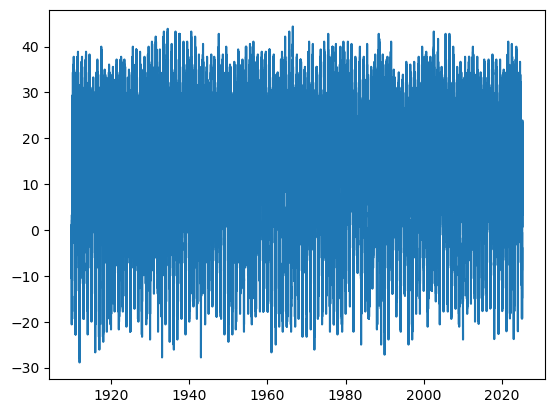

In [9]:
plt.plot(PRCP)

In [3]:
# Read and process the date
TEMP_max = pd.read_csv("Prec_temp/PipeSpring_3975404.csv", delimiter=',', usecols=['DATE', 'TMAX'], 
                     parse_dates=['DATE'], index_col='DATE')

TEMP_min = pd.read_csv("Prec_temp/PipeSpring_3975404.csv", delimiter=',', usecols=['DATE', 'TMIN'], 
                     parse_dates=['DATE'], index_col='DATE')

TEMP_avg = (TEMP_max['TMAX'] + TEMP_min['TMIN']) / 2
TEMP_avg = pd.DataFrame(TEMP_avg, columns=['TEMP_avg'])


lat =  pd.read_csv("Prec_temp/PipeSpring_3975404.csv", delimiter=',', usecols=['LATITUDE'])
LAT = lat.at[0, 'LATITUDE'] * np.pi / 180 # Latitude [rad]

In [4]:
pet_har = pyet.hargreaves(TEMP_avg['TEMP_avg'], TEMP_max['TMAX'], TEMP_min['TMIN'], LAT, method=1)

C:\Users\irish\anaconda\envs\mude\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [5]:
pet_har

DATE
1963-06-01         NaN
1963-06-02         NaN
1963-06-03         NaN
1963-06-04         NaN
1963-06-05         NaN
                ...   
2025-03-04    1.400183
2025-03-05    3.027931
2025-03-06    2.707983
2025-03-12    4.115601
2025-03-13         NaN
Name: Hargreaves, Length: 22221, dtype: float64

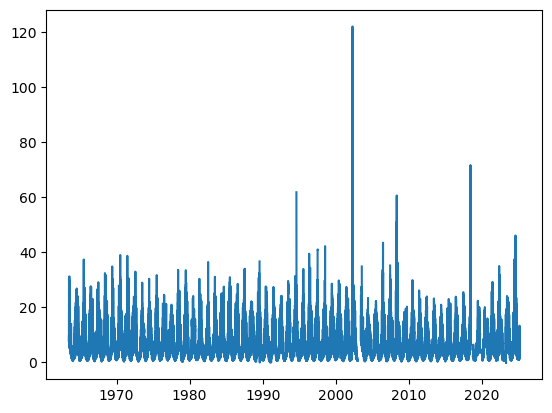

In [6]:
plt.plot(pet_har)

In [7]:
pet_har.to_csv('Evap\PipeSpring.csv')

In [8]:
# Read and process the date
TEMP_max = pd.read_csv("Prec_temp/Tallahasse_3976539.csv", delimiter=',', usecols=['DATE', 'TMAX'], 
                     parse_dates=['DATE'], index_col='DATE')

TEMP_min = pd.read_csv("Prec_temp/Tallahasse_3976539.csv", delimiter=',', usecols=['DATE', 'TMIN'], 
                     parse_dates=['DATE'], index_col='DATE')

TEMP_avg = (TEMP_max['TMAX'] + TEMP_min['TMIN']) / 2
TEMP_avg = pd.DataFrame(TEMP_avg, columns=['TEMP_avg'])


lat =  pd.read_csv("Prec_temp/Tallahasse_3976539.csv", delimiter=',', usecols=['LATITUDE'])
LAT = lat.at[0, 'LATITUDE'] * np.pi / 180 # Latitude [rad]

In [9]:
pet_har = pyet.hargreaves(TEMP_avg['TEMP_avg'], TEMP_max['TMAX'], TEMP_min['TMIN'], LAT, method=1)

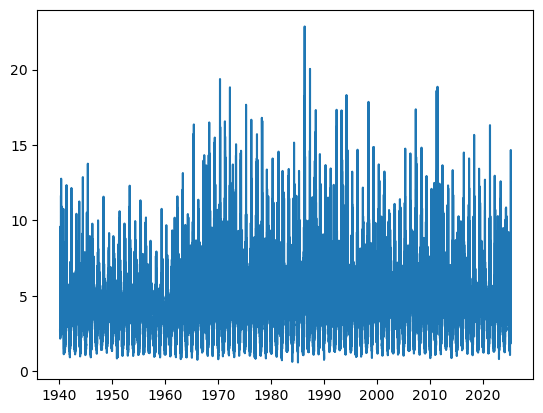

In [11]:
plt.plot(pet_har)

In [12]:
pet_har.to_csv('Evap\Tallahasse.csv')

In [2]:
# Read and process the date
TEMP_max = pd.read_csv("Prec_temp/Atlanta_3998160.csv", , usecols=['DATE', 'TMAX'], 
                     parse_dates=['DATE'], index_col='DATE')

TEMP_min = pd.read_csv("Prec_temp/Atlanta_3998160.csv", delimiter=',', usecols=['DATE', 'TMIN'], 
                     parse_dates=['DATE'], index_col='DATE')

TEMP_avg = (TEMP_max['TMAX'] + TEMP_min['TMIN']) / 2
TEMP_avg = pd.DataFrame(TEMP_avg, columns=['TEMP_avg'])


lat =  pd.read_csv("Prec_temp/Atlanta_3998160.csv", delimiter=',', usecols=['LATITUDE'])
LAT = lat.at[0, 'LATITUDE'] * np.pi / 180 # Latitude [rad]

ValueError: Usecols do not match columns, columns expected but not found: ['TMAX', 'DATE']

In [4]:
# Read and process the date
TEMP_max = pd.read_csv("Prec_temp/SanFrancisco_4008636.csv", delimiter=',', usecols=['DATE', 'TMAX'], 
                     parse_dates=['DATE'], index_col='DATE')

TEMP_min = pd.read_csv("Prec_temp/SanFrancisco_4008636.csv", delimiter=',', usecols=['DATE', 'TMIN'], 
                     parse_dates=['DATE'], index_col='DATE')

TEMP_avg = (TEMP_max['TMAX'] + TEMP_min['TMIN']) / 2
TEMP_avg = pd.DataFrame(TEMP_avg, columns=['TEMP_avg'])


lat =  pd.read_csv("Prec_temp/SanFrancisco_4008636.csv", delimiter=',', usecols=['LATITUDE'])
LAT = lat.at[0, 'LATITUDE'] * np.pi / 180 # Latitude [rad]

C:\Users\irish\AppData\Local\Temp\ipykernel_1656\512167271.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  TEMP_max = pd.read_csv("Prec_temp/SanFrancisco_4008636.csv", delimiter=',', usecols=['DATE', 'TMAX'],
C:\Users\irish\AppData\Local\Temp\ipykernel_1656\512167271.py:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  TEMP_min = pd.read_csv("Prec_temp/SanFrancisco_4008636.csv", delimiter=',', usecols=['DATE', 'TMIN'],


In [5]:
pet_har = pyet.hargreaves(TEMP_avg['TEMP_avg'], TEMP_max['TMAX'], TEMP_min['TMIN'], LAT, method=1)

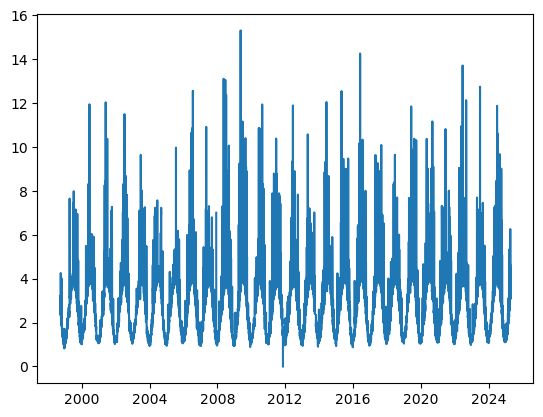

In [6]:
plt.plot(pet_har)

In [7]:
pet_har.to_csv('Evap\SanFrancisco.csv')

In [16]:
# Read and process the date
TEMP_max = pd.read_csv("Prec_temp/StLouis_4008631.csv", delimiter=',', usecols=['DATE', 'TMAX'], 
                     parse_dates=['DATE'], index_col='DATE')

TEMP_min = pd.read_csv("Prec_temp/StLouis_4008631.csv", delimiter=',', usecols=['DATE', 'TMIN'], 
                     parse_dates=['DATE'], index_col='DATE')

TEMP_avg = (TEMP_max['TMAX'] + TEMP_min['TMIN']) / 2
TEMP_avg = pd.DataFrame(TEMP_avg, columns=['TEMP_avg'])


lat =  pd.read_csv("Prec_temp/StLouis_4008631.csv", delimiter=',', usecols=['LATITUDE'])
LAT = lat.at[0, 'LATITUDE'] * np.pi / 180 # Latitude [rad]

C:\Users\irish\AppData\Local\Temp\ipykernel_12248\1619789189.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  TEMP_max = pd.read_csv("Prec_temp/StLouis_4008631.csv", delimiter=',', usecols=['DATE', 'TMAX'],
C:\Users\irish\AppData\Local\Temp\ipykernel_12248\1619789189.py:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  TEMP_min = pd.read_csv("Prec_temp/StLouis_4008631.csv", delimiter=',', usecols=['DATE', 'TMIN'],


In [17]:
pet_har = pyet.hargreaves(TEMP_avg['TEMP_avg'], TEMP_max['TMAX'], TEMP_min['TMIN'], LAT, method=1)

In [18]:
pet_har

DATE
1938-04-13    5.029731
1938-04-14    3.532502
1938-04-15    3.639254
1938-04-16    3.816278
1938-04-17    3.653444
                ...   
2025-04-24    4.599003
2025-04-25    3.970013
2025-04-26    3.298989
2025-04-27    3.392638
2025-04-28         NaN
Name: Hargreaves, Length: 31789, dtype: float64

In [19]:
pet_har.to_csv('Evap\StLouis.csv')

In [20]:
# Read and process the date
TEMP_max = pd.read_csv("Prec_temp/Miami_4008629.csv", delimiter=',', usecols=['DATE', 'TMAX'], 
                     parse_dates=['DATE'], index_col='DATE')

TEMP_min = pd.read_csv("Prec_temp/Miami_4008629.csv", delimiter=',', usecols=['DATE', 'TMIN'], 
                     parse_dates=['DATE'], index_col='DATE')

TEMP_avg = (TEMP_max['TMAX'] + TEMP_min['TMIN']) / 2
TEMP_avg = pd.DataFrame(TEMP_avg, columns=['TEMP_avg'])


lat =  pd.read_csv("Prec_temp/Miami_4008629.csv", delimiter=',', usecols=['LATITUDE'])
LAT = lat.at[0, 'LATITUDE'] * np.pi / 180 # Latitude [rad]

C:\Users\irish\AppData\Local\Temp\ipykernel_12248\2656095058.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  TEMP_max = pd.read_csv("Prec_temp/Miami_4008629.csv", delimiter=',', usecols=['DATE', 'TMAX'],
C:\Users\irish\AppData\Local\Temp\ipykernel_12248\2656095058.py:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  TEMP_min = pd.read_csv("Prec_temp/Miami_4008629.csv", delimiter=',', usecols=['DATE', 'TMIN'],


In [21]:
pet_har = pyet.hargreaves(TEMP_avg['TEMP_avg'], TEMP_max['TMAX'], TEMP_min['TMIN'], LAT, method=1)

In [22]:
pet_har

DATE
1948-01-13    2.695912
1948-01-14    2.415486
1948-01-15    1.490444
1948-01-16    2.614079
1948-01-17    2.533213
                ...   
2025-04-24    4.804937
2025-04-25    4.748651
2025-04-26    4.816565
2025-04-27    4.513828
2025-04-28         NaN
Name: Hargreaves, Length: 28231, dtype: float64

In [23]:
pet_har.to_csv('Evap\Miami.csv')

In [24]:
# Read and process the date
TEMP_max = pd.read_csv("Prec_temp/Atlanta_4008630.csv", delimiter=',', usecols=['DATE', 'TMAX'], 
                     parse_dates=['DATE'], index_col='DATE')

TEMP_min = pd.read_csv("Prec_temp/Atlanta_4008630.csv", delimiter=',', usecols=['DATE', 'TMIN'], 
                     parse_dates=['DATE'], index_col='DATE')

TEMP_avg = (TEMP_max['TMAX'] + TEMP_min['TMIN']) / 2
TEMP_avg = pd.DataFrame(TEMP_avg, columns=['TEMP_avg'])


lat =  pd.read_csv("Prec_temp/Atlanta_4008630.csv", delimiter=',', usecols=['LATITUDE'])
LAT = lat.at[0, 'LATITUDE'] * np.pi / 180 # Latitude [rad]

C:\Users\irish\AppData\Local\Temp\ipykernel_12248\2459038341.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  TEMP_max = pd.read_csv("Prec_temp/Atlanta_4008630.csv", delimiter=',', usecols=['DATE', 'TMAX'],
C:\Users\irish\AppData\Local\Temp\ipykernel_12248\2459038341.py:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  TEMP_min = pd.read_csv("Prec_temp/Atlanta_4008630.csv", delimiter=',', usecols=['DATE', 'TMIN'],


In [25]:
pet_har = pyet.hargreaves(TEMP_avg['TEMP_avg'], TEMP_max['TMAX'], TEMP_min['TMIN'], LAT, method=1)

In [26]:
pet_har

DATE
1930-01-13    1.561208
1930-01-14    1.704979
1930-01-15    1.432099
1930-01-16    0.891832
1930-01-17    0.852287
                ...   
2025-04-24    3.983937
2025-04-25    4.175295
2025-04-26    4.074361
2025-04-27    4.284792
2025-04-28         NaN
Name: Hargreaves, Length: 34804, dtype: float64

In [27]:
pet_har.to_csv('Evap\Atlanta.csv')

In [28]:
# Read and process the date
TEMP_max = pd.read_csv("Prec_temp/Sacremento_4008640.csv", delimiter=',', usecols=['DATE', 'TMAX'], 
                     parse_dates=['DATE'], index_col='DATE')

TEMP_min = pd.read_csv("Prec_temp/Sacremento_4008640.csv", delimiter=',', usecols=['DATE', 'TMIN'], 
                     parse_dates=['DATE'], index_col='DATE')

TEMP_avg = (TEMP_max['TMAX'] + TEMP_min['TMIN']) / 2
TEMP_avg = pd.DataFrame(TEMP_avg, columns=['TEMP_avg'])


lat =  pd.read_csv("Prec_temp/Sacremento_4008640.csv", delimiter=',', usecols=['LATITUDE'])
LAT = lat.at[0, 'LATITUDE'] * np.pi / 180 # Latitude [rad]

C:\Users\irish\AppData\Local\Temp\ipykernel_12248\2813350371.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  TEMP_max = pd.read_csv("Prec_temp/Sacremento_4008640.csv", delimiter=',', usecols=['DATE', 'TMAX'],
C:\Users\irish\AppData\Local\Temp\ipykernel_12248\2813350371.py:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  TEMP_min = pd.read_csv("Prec_temp/Sacremento_4008640.csv", delimiter=',', usecols=['DATE', 'TMIN'],


In [29]:
pet_har = pyet.hargreaves(TEMP_avg['TEMP_avg'], TEMP_max['TMAX'], TEMP_min['TMIN'], LAT, method=1)

In [30]:
pet_har

DATE
1900-09-16    3.200859
1900-09-17    3.871976
1900-09-18    5.459588
1900-09-19    3.877517
1900-09-20    4.139695
                ...   
2025-04-23    3.611161
2025-04-24    3.220792
2025-04-25    3.105627
2025-04-26    3.133866
2025-04-27         NaN
Name: Hargreaves, Length: 45439, dtype: float64

In [31]:
pet_har.to_csv('Evap\Sacremento.csv')